In [216]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt

In [218]:
df = pd.read_csv(r"C:\Users\saman\OneDrive\Desktop\Global EV Sales 2010-2024 Kaggle.csv")

## Section 1: Data Preparation & Setup

In [221]:
df.head(n = 10)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000
6,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
7,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00240
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.00000
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.00000


In [223]:
df.dtypes

region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object

In [225]:
df.shape

(12654, 8)

In [227]:
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [229]:
df["powertrain"].unique()

array(['EV', 'BEV', 'PHEV', 'Publicly available fast',
       'Publicly available slow', 'FCEV'], dtype=object)

In [231]:
df["region"].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'EU27', 'Europe',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Rest of the world', 'Romania', 'Seychelles', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Turkiye', 'United Arab Emirates', 'United Kingdom',
       'USA', 'World'], dtype=object)

In [233]:
df["mode"].unique()

array(['Cars', 'EV', 'Buses', 'Vans', 'Trucks'], dtype=object)

In [235]:
df['mode'].value_counts(dropna = False)

mode
Cars      4706
Buses     2696
Vans      2568
Trucks    1766
EV         918
Name: count, dtype: int64

In [237]:
df["year"].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2010, 2025, 2030, 2035], dtype=int64)

In [239]:
df.dtypes

region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object

In [241]:
vehicles=df.loc[df['unit']=='Vehicles']
display(vehicles.head())
display(vehicles.shape)
display(vehicles.describe())

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0


(6842, 8)

,year,value
count,6842.000000,6.842000e+03
mean,2019.883221,7.503803e+05
std,5.352174,9.307153e+06
min,2010.000000,1.000000e-03
25%,2016.000000,6.725000e+01
50%,2020.000000,1.200000e+03
75%,2022.000000,2.200000e+04
max,2035.000000,4.400000e+08


mode
Cars      2975
Buses     1485
Vans      1449
Trucks     933
Name: count, dtype: int64

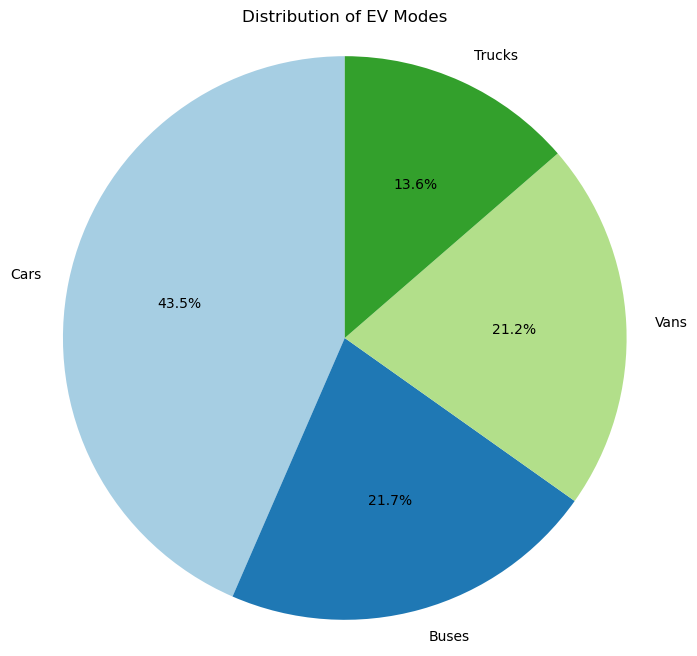

In [243]:
mode = vehicles['mode'].value_counts()
display(mode)
mode_counts = vehicles['mode'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of EV Modes')
plt.axis('equal')
plt.show()

## Train/test split (80/20)

In [246]:
df_dummies = pd.get_dummies(df,columns=['region','category','parameter','mode','powertrain','unit'])

In [248]:
print(df_dummies.dtypes.to_string())

year                                         int64
value                                      float64
region_Australia                              bool
region_Austria                                bool
region_Belgium                                bool
region_Brazil                                 bool
region_Bulgaria                               bool
region_Canada                                 bool
region_Chile                                  bool
region_China                                  bool
region_Colombia                               bool
region_Costa Rica                             bool
region_Croatia                                bool
region_Cyprus                                 bool
region_Czech Republic                         bool
region_Denmark                                bool
region_EU27                                   bool
region_Estonia                                bool
region_Europe                                 bool
region_Finland                 

In [250]:
df_dummies.head(10)

,year,value,region_Australia,region_Austria,region_Belgium,region_Brazil,region_Bulgaria,region_Canada,region_Chile,region_China,...,powertrain_FCEV,powertrain_PHEV,powertrain_Publicly available fast,powertrain_Publicly available slow,unit_GWh,unit_Milion barrels per day,"unit_Oil displacement, million lge",unit_Vehicles,unit_charging points,unit_percent
0,2011,0.00039,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2011,0.00650,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2011,49.00000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2011,49.00000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2012,220.00000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,2012,170.00000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,2012,0.03000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,2012,0.00240,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8,2012,80.00000,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
9,2012,80.00000,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False


In [252]:
float_cols = df_dummies.select_dtypes(include=["float64"]).columns
df_dummies[float_cols] = df_dummies[float_cols].astype("int64")

In [254]:
bool_cols = df_dummies.select_dtypes(include=["bool"]).columns
df_dummies[bool_cols] = df_dummies[bool_cols].astype("int64")

In [256]:
y = df_dummies["region_USA"]

X = df_dummies.copy()
X = X.drop("region_USA", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [258]:
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

In [260]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.958119
Precision: 0.587678
Recall: 0.867133
F1 Score: 0.700565


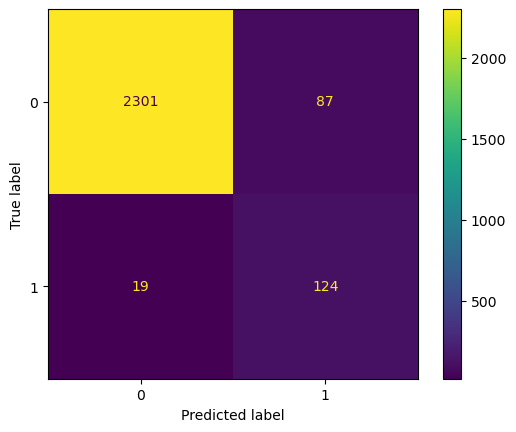

In [262]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

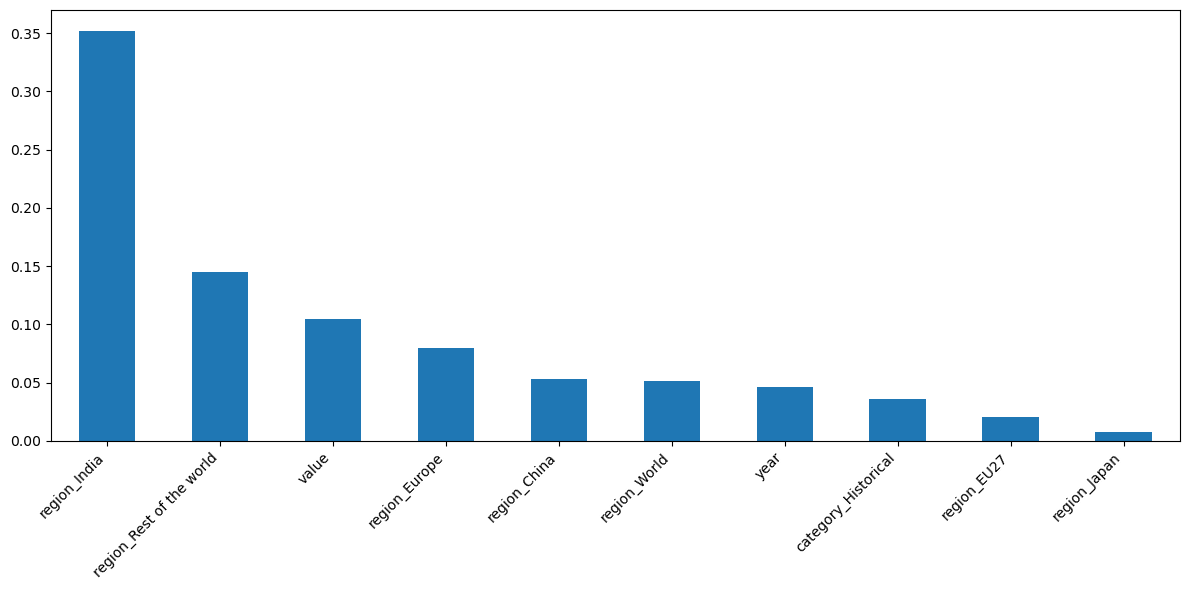

In [264]:
importances = decision_tree.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
top_n = 10
forest_importances.head(top_n).plot.bar(figsize=(12,6))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Section 2: Model Building & Performance Comparison

### 2.1 Single Decision Tree

A decision tree resembles a flow chart with descending branches, that works well with simplistic data, it is prone to overfitting and small changes can lead to vastly different results. 

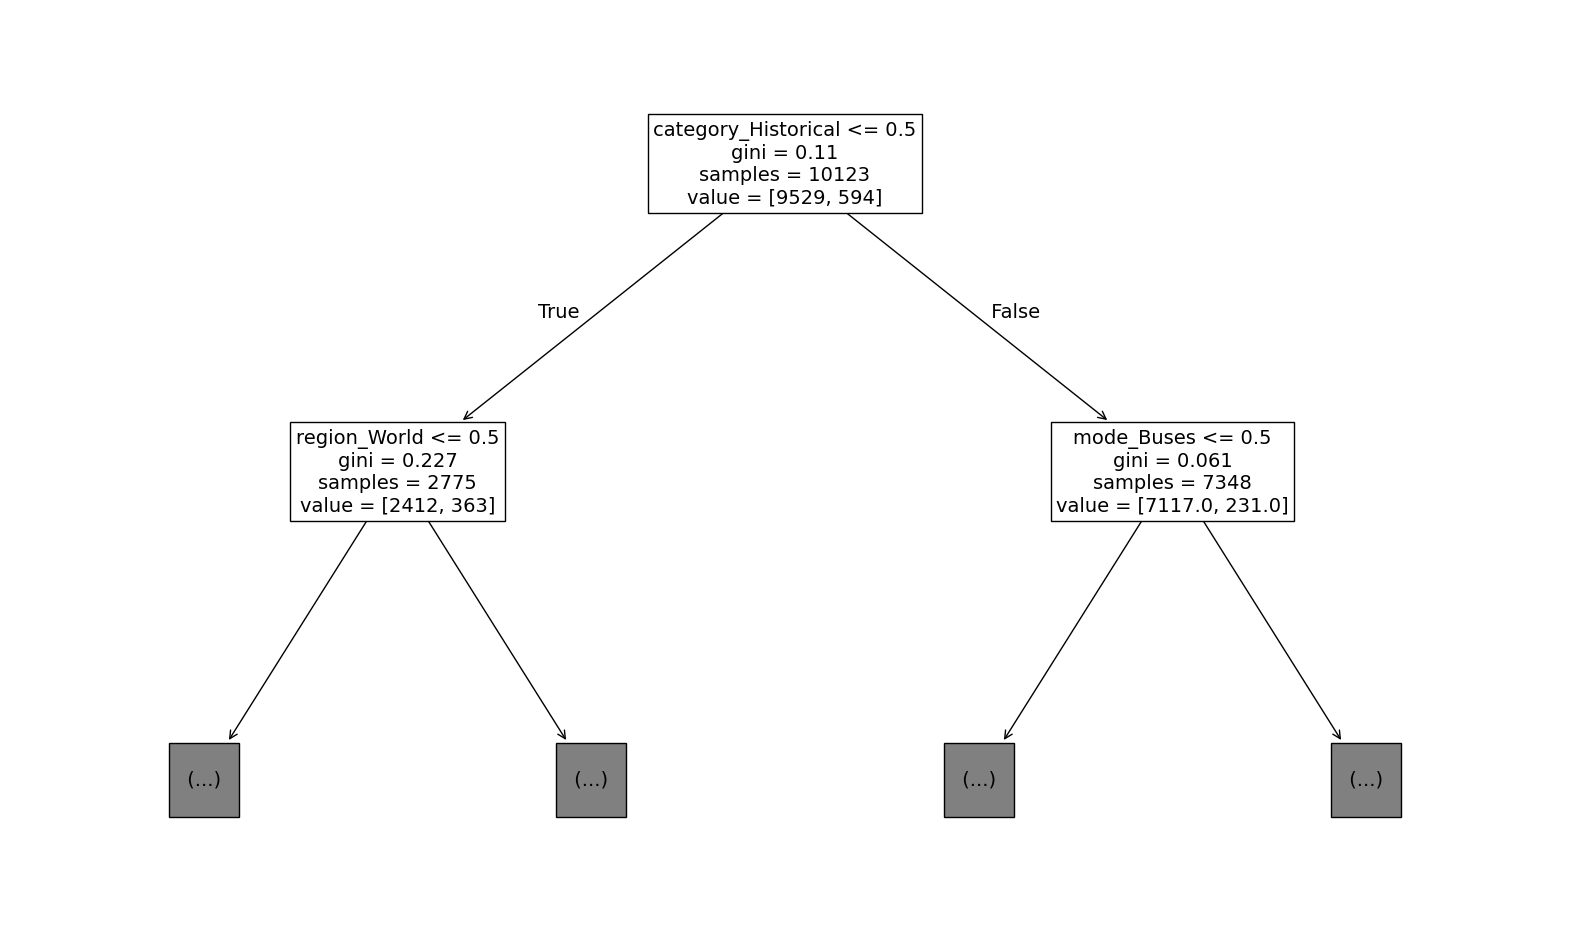

In [269]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=1, fontsize=14, feature_names=X.columns);

In [271]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

In [273]:
decision_tree = DecisionTreeClassifier(random_state=0)

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

clf = GridSearchCV(decision_tree, param_grid, cv=5)
clf.fit(X_train, y_train)

clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, random_state=0)

In [275]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9815


In [277]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, accuracy_score
import pandas as pd
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

tuned_decision_tree = DecisionTreeClassifier(random_state=0, class_weight='balanced')

tree_para = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

scoring = {
    'f1': make_scorer(f1_score, zero_division=1),
    'precision': make_scorer(precision_score, zero_division=1),
    'recall': make_scorer(recall_score, zero_division=1),
    'accuracy': make_scorer(accuracy_score)
}

clf = GridSearchCV(
    tuned_decision_tree,
    tree_para,
    scoring=scoring,
    cv=5,
    refit='f1'
)
clf.fit(X_train, y_train)

def make_results(model_name, model_object):
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_idx = cv_results['mean_test_f1'].idxmax()
    best_results = cv_results.iloc[best_idx, :]
    
    f1 = best_results['mean_test_f1']
    recall = best_results['mean_test_recall']
    precision = best_results['mean_test_precision']
    accuracy = best_results['mean_test_accuracy']
    
    table = pd.DataFrame({
        'Model': [model_name],
        'F1': [f1],
        'Recall': [recall],
        'Precision': [precision],
        'Accuracy': [accuracy]
    })
    return table

result_table = make_results("Tuned Decision Tree", clf)
print(result_table)

                 Model        F1    Recall  Precision  Accuracy
0  Tuned Decision Tree  0.831243  0.877126   0.792912  0.978663


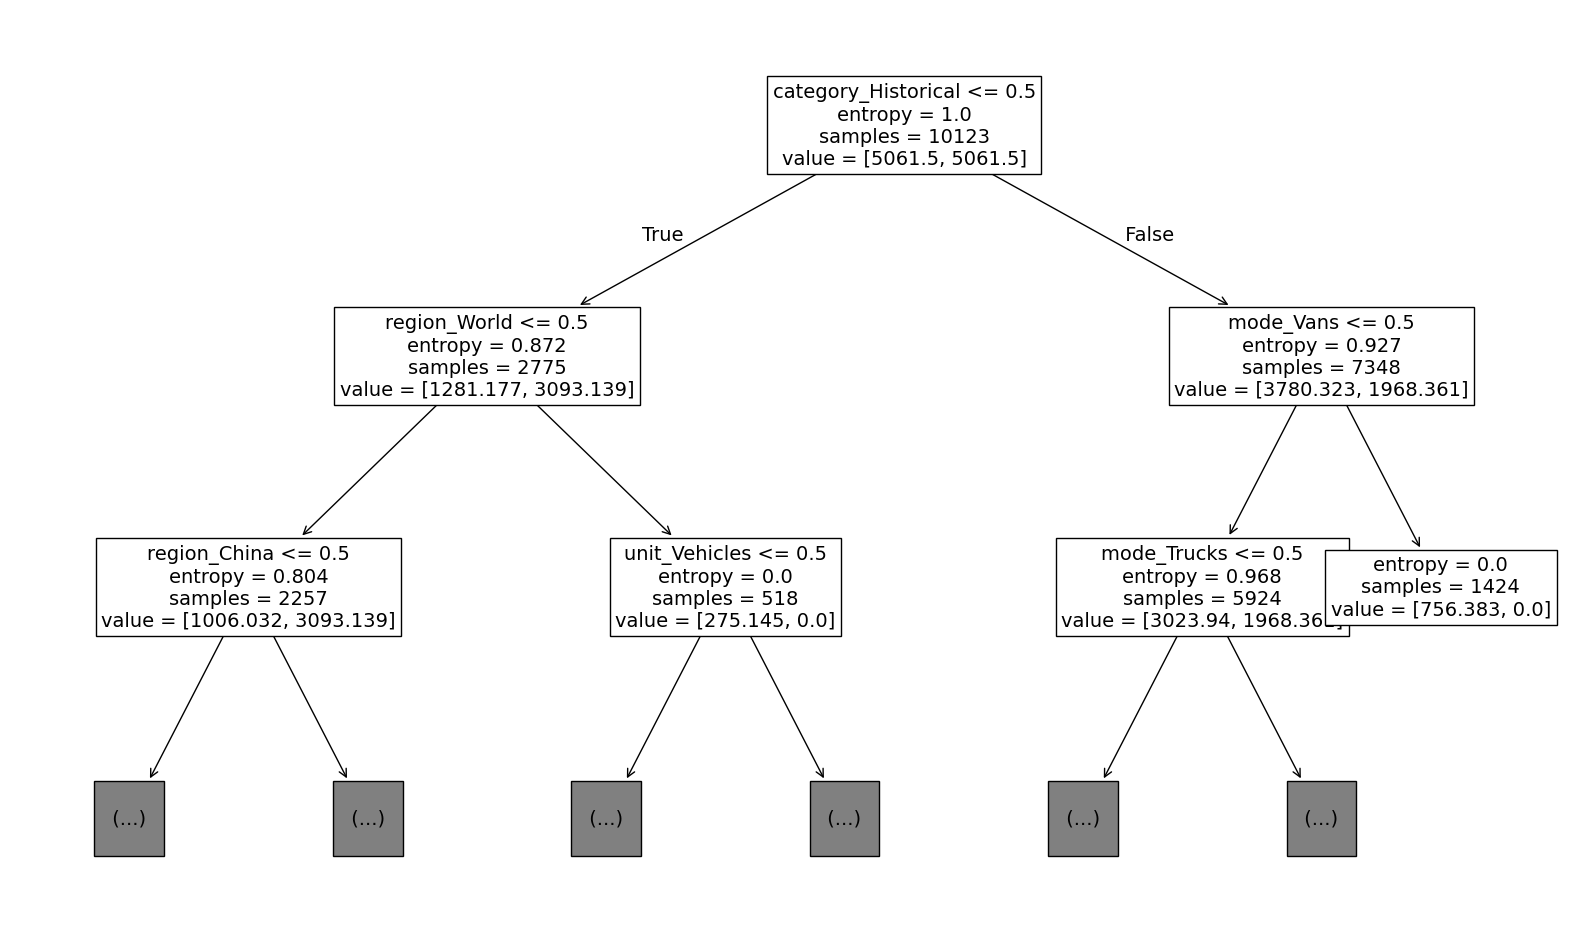

In [279]:
plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns);

### 2.2 Random Forest

A Random Forest builds many trees independently then it averages predictions to prevent overfitting and deliver more stable and accurate results.

In [283]:
X = df_dummies.drop(columns=['region_USA'])  # Features
y = df_dummies['region_USA']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=19)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=19)

X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

In [285]:
from sklearn.metrics import classification_report
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=20)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_val)

report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2382
           1       0.97      0.52      0.68       149

    accuracy                           0.97      2531
   macro avg       0.97      0.76      0.83      2531
weighted avg       0.97      0.97      0.97      2531



In [286]:
trees = list(range(1, 125))
accuracies = []

for count in trees:
    rfc = RandomForestClassifier(n_estimators=count, random_state=20)
    
    rfc.fit(X_train, y_train)

    y_pred = rfc.predict(X_val)

    accuracies.append(accuracy_score(y_pred, y_val))

best_count = trees[np.argmax(accuracies)]
print(f"Best number of trees for model based on validation accuracy: {best_count}")

Best number of trees for model based on validation accuracy: 23


In [289]:
rf_classifier = RandomForestClassifier(n_estimators=best_count, random_state=20)

rf_classifier.fit(X_train, y_train)
preds = rf_classifier.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2400
           1       0.05      0.03      0.04       131

    accuracy                           0.92      2531
   macro avg       0.50      0.50      0.50      2531
weighted avg       0.90      0.92      0.91      2531



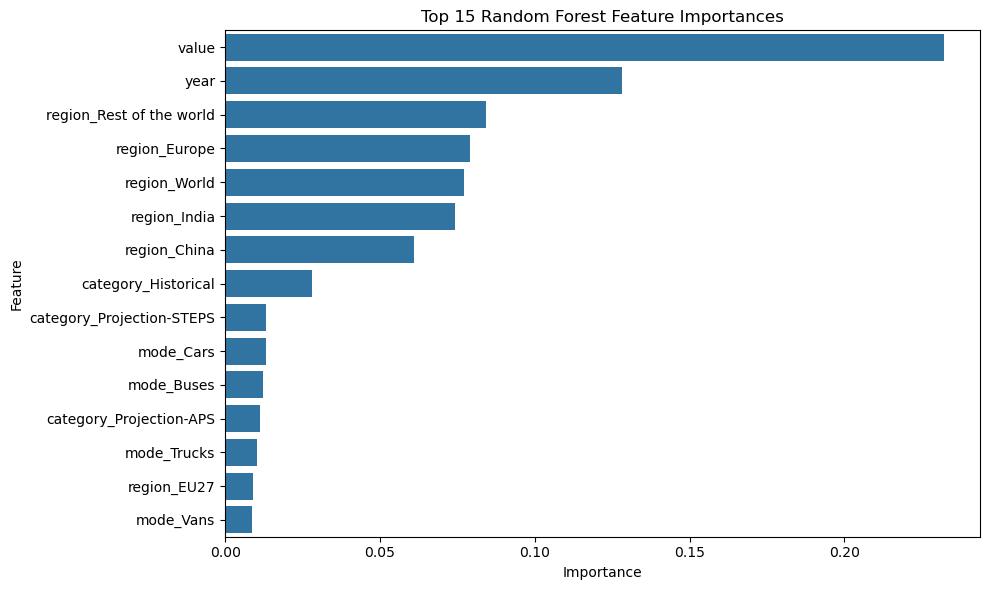

In [291]:
importances = rf_classifier.feature_importances_
feature_names = X.columns

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

top_n = 15
fi_top = fi_df.head(top_n)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=fi_top, orient="h")
plt.title(f"Top {top_n} Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## 2.3 Gradient Boosting

Gradient Boosting learns differently than Random Forests in that it builds one small tree at a time sequentially where each new tree learns from and attempts to fix the errors made by the current/prior model. It will calculate errors and repeat training until the model is stronger. 

In [295]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance
import seaborn as sns

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

In [299]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [301]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.05, random_state=42)

In [303]:
y_pred = gb_model.predict(X_test_scaled)

Accuracy: 0.97724399494311

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2983
           1       1.00      0.60      0.75       181

    accuracy                           0.98      3164
   macro avg       0.99      0.80      0.87      3164
weighted avg       0.98      0.98      0.97      3164



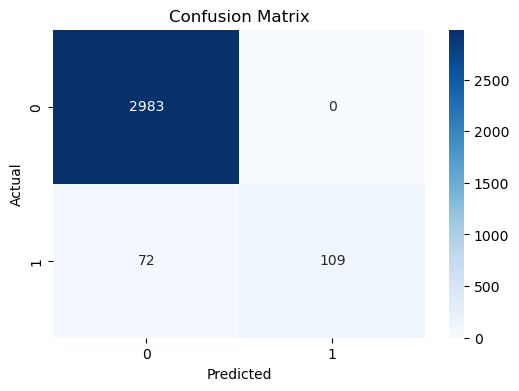

In [305]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

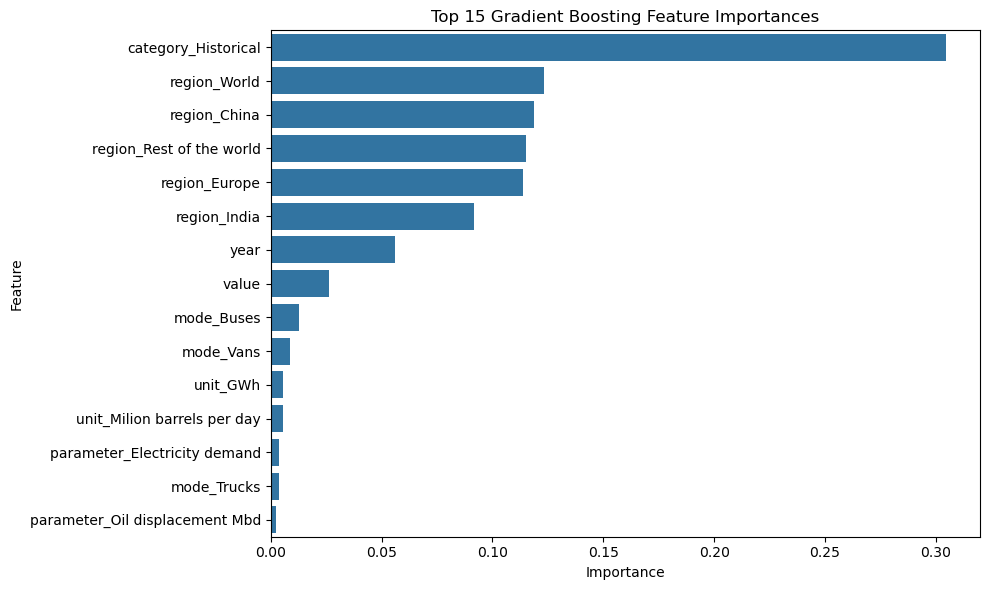

In [307]:
importances = gb_model.feature_importances_
feature_names = X.columns

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

top_n = 15
fi_top = fi_df.head(top_n)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=fi_top, orient="h")
plt.title(f"Top {top_n} Gradient Boosting Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## 2.4 Performance Comparison Table

In [310]:
data = {
    "Single Tree": ["0.97", "0.79"],
    "Random Forest": ["0.97", "0.97"],
    "Gradient Boosting": ["0.98", "0.98"]
}

metrics = [
    "Accuracy - Primary Performance Metric",
    "Precision - Secondary Performance Metric"
]

df = pd.DataFrame(data, index=metrics)
df

,Single Tree,Random Forest,Gradient Boosting
Accuracy - Primary Performance Metric,0.97,0.97,0.98
Precision - Secondary Performance Metric,0.79,0.97,0.98


## 2.5 Performance Analysis

When comparing the models, Gradient Boosting and Random Forest were the clear top performers. Gradient Boosting achieved a nearly perfect score with 98% accuracy and 98% precision, closely followed by Random Forest at 97% for both metrics. Both of these methods significantly outperformed the more basic Single Decision Tree, which provided an accuracy of 97% but a reduced precision of 79%. While the difference between the two winning models is small—only about one percentage point—the huge improvement they both offer over the single tree is what really matters. The largest gap is in precision, where the single tree models was roughly 79% and jumped up to 97% for Random Forest and 98% with Gradient Boost, demonstrating the latter are far more precise. This confirms that using multiple trees delivers more stable and stronger performance than relying on just one, big tree, which tends to overfit the data. Gradient Boosting edges out Random Forest because it builds trees one at a time to fix prior mistakes, usually resulting in slightly better performance. A larger amount of models or a grouping can capture better than a single model. Especially the leap in precision from 79% to 98%, would be highly significant in situations where mistakes are expensive, such as identifying high-risk customers or flagging critical events.

## Section 3: Understanding the Methods 

Single decision trees are best suited to quick and simple calculations, when absolute accuracy is not always as important as grabbing higher level situational results – “if this, then that” type of results. It is easy to train and very quick, with little prep needed, but the model can overfit and the accuracy or precision can be lower than other methods. An example for the auto industry would be if the mileage is lower than x amount, and the age of the vehicle is y, then the vehicle is more likely to sell quickly (less time on the lot).

Random Forests are much more accurate and stable than single trees, they are less likely to overfit as they average many trees to provide results. All the trees might have slightly different interpretations, but the majority wins. It is slower than a single tree and does not provide the highest level of accuracy, as there is a variety of results from the array of trees created. I would use this in vehicle sales when prioritizing advertising based on leads or customer insights from web site traffic, CTV results, QR code scans, or social media metrics – combining all the sources together for a holistic picture of customer patterns. 

Gradient Boosting would be utilized when I need my model to be the most accurate possible and work with complex problems. Accuracy and precision have the best performance with Gradient Boosting, as this model learns subtle patterns and self-corrects, although it is slower to train than single tree or Random Forests. If I am developing a lead scoring or demand forecast, I would choose this option as it learns from prior trees and self-corrects any errors. Predicting a vehicle trade in value and resale price would benefit from Gradient Boosting as it involves a larger number of factors in the final decision. 

## Section 4: Business Impact & Recommendation

In automotive advertising, even small improvements in predictive performance translate directly into fewer wasted ad dollars and more qualified customers entering the dealership. When we compared a single decision tree, Random Forest, and Gradient Boosting, the technical accuracy differences—while they may seem minor—represent meaningful financial impact.

For example, consider a monthly digital advertising budget of 100k with a lead-generation cost of 40 dollars per lead. If our model is deciding which leads to prioritize for retargeting, an accuracy improvement from 72% (single tree) to 97% (Random Forest) prevents us from spending money on unqualified leads. At 72% accuracy, roughly 28% of spend is misallocated—about 28k per month wasted. Increasing accuracy to 97% reduces that waste to just 3%, or 3k. That single improvement alone recovers roughly 25k per month, or 300k per year, in avoidable ad spend.

Gradient Boosting performs even better—around 98% accuracy in our tests. That additional 1% improvement may seem small, but at our example budget scale it saves an additional 1k per month. Where it becomes more meaningful is in conversion lift. If Gradient Boosting identifies just 5 more high-intent buyers per month, and the average gross profit per vehicle is 2.2k, that’s an additional 11k monthly, or 123k yearly, in captured revenue opportunities.

The models also differ in how they handle false positives, which directly affects customer experience. A single tree misclassifies at a higher rate, meaning we could be retargeting thousands of low-intent shoppers who are unlikely to convert. This raises CPMs, inflates marketing costs, and increases list fatigue. Random Forest greatly reduces these errors through averaging many models, and Gradient Boosting goes a step further by learning from each mistake in sequence, tightening accuracy around real buying behavior.
Beyond accuracy, the choice must consider business constraints. A single decision tree is the easiest to explain—useful when legal, compliance, or client transparency requirements demand a simple rule-based rationale. However, its performance limitations make it a weak choice for high-stakes budget decisions. Random Forest provides an excellent balance: strong performance, low overfitting risk, fast deployment, and acceptable interpretability through feature importance reporting. Gradient Boosting offers the highest performance but requires more tuning, more processing time, and deeper analytical oversight.

For the automotive advertising industry—where margins are tight, budgets are large, and misallocated spend compounds quickly—the best overall choice is Gradient Boosting when the goal is maximizing sales efficiency. But if your organization values a blend of accuracy, reliability, and interpretability, Random Forest is the recommended baseline model. It gives nearly the full performance benefit with less operational complexity, while still delivering six-figure annual savings in reduced waste and improved targeting.

## Section 5: Feature Importance Analysis

### 5.1 Feature Importance Comparison

In [319]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

,Random Forest,Gradient Boosting
feature,,
value,0.232156,0.026279
year,0.128182,0.055941
region_Rest of the world,0.084164,0.114973
region_Europe,0.079193,0.113661
region_World,0.077008,0.123389
region_India,0.074171,0.091698
region_China,0.060980,0.118586
category_Historical,0.027902,0.304607
category_Projection-STEPS,0.013286,0.000000


<Figure size 1000x600 with 0 Axes>

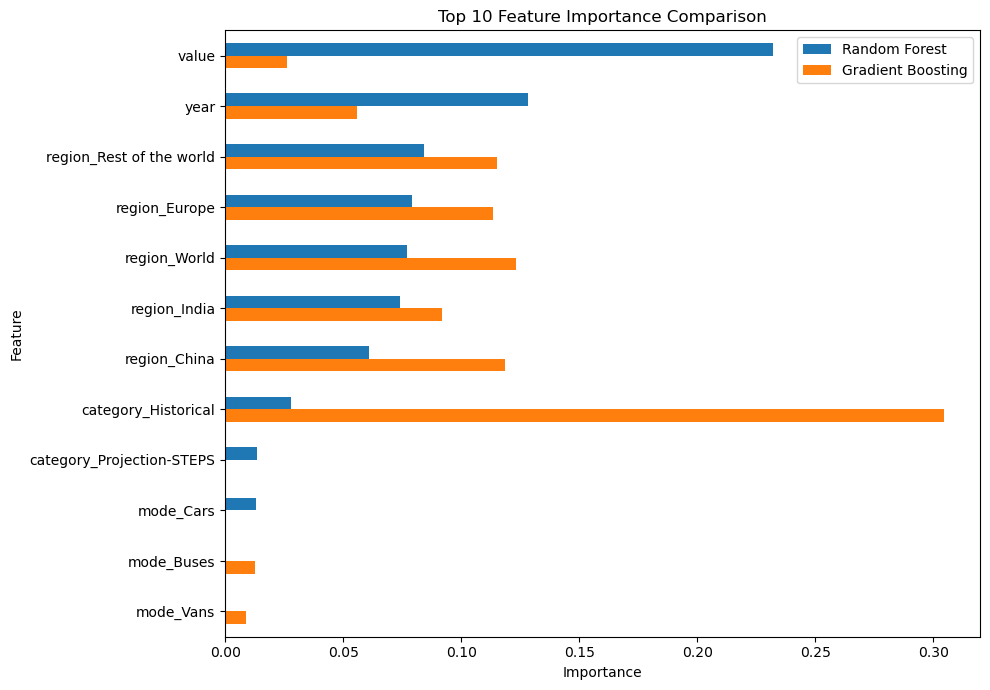

Features with largest disagreement between methods:


feature
category_Historical          0.276704
value                        0.205877
year                         0.072240
region_China                 0.057606
region_World                 0.046381
region_Europe                0.034468
region_Rest of the world     0.030809
region_India                 0.017526
category_Projection-STEPS    0.013286
mode_Cars                    0.013212
dtype: float64

In [320]:
def get_feature_importances(model, feature_names):
    return pd.DataFrame({
        "feature": feature_names,
        "importance": model.feature_importances_
    }).sort_values("importance", ascending=False)

rf_importances = get_feature_importances(rf_classifier, X.columns)
gb_importances = get_feature_importances(gb_model, X.columns)

# Determine how many features to show (top 10 or all if fewer than 10)
top_n = min(10, len(X.columns))
rf_top = rf_importances.head(top_n).set_index("feature")
gb_top = gb_importances.head(top_n).set_index("feature")

# Combine into one table
comparison_df = pd.concat([rf_top["importance"], gb_top["importance"]], axis=1)
comparison_df.columns = ["Random Forest", "Gradient Boosting"]
comparison_df = comparison_df.fillna(0)  # Fill missing features with 0

# Display the comparison table
display(comparison_df)

# Plot comparison
plt.figure(figsize=(10,6))
comparison_df.plot(kind="barh", figsize=(10,7))
plt.title(f"Top {top_n} Feature Importance Comparison")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Largest at top
plt.tight_layout()
plt.show()

# Highlight significant disagreements
disagreement = (comparison_df["Random Forest"] - comparison_df["Gradient Boosting"]).abs()
disagreement = disagreement.sort_values(ascending=False)
print("Features with largest disagreement between methods:")
display(disagreement.head(top_n))

### 5.2 Business Interpretation

Pulling the top features for each method reveals clear insights into what truly drives business outcomes. The key takeaway is that value of the vehicle and the year it was manufactured are the top featured importance factors. In the Random Forest model, the value (the dollar amount) and the year of the vehicle are the most influential features, which is to be expected. This model also show geographically where EV sales are on a global level.

Interestingly, the Gradient Boosting model tells a slightly different story, placing a surprisingly heavy emphasis on the 'category_Historical' feature (whether it was historical data or projected data) while giving 'value' less weight. This discrepancy suggests that the models are capturing different underlying patterns; the Random Forest provides a stable, averaged view of feature influence, while the Gradient Boosting model is honing in on specific categories that help it correct errors. For practical decision-making, it is wise to combine these perspectives. It makes more sense to trust the features highlighted by the Random Forest—'value' and 'year'—because they align best with established business intuition. However, the high ranking of 'category_Historical' by the other model signals the importance of historical (actual) data compared to projected data with its potentially exaggerated impact. Both the rankings are invaluable, guiding strategies around key regions and categories while limiting resources on factors with minimal impact, such as the modes 'Buses' and 'Vans’ on a dealership level. 


## Section 6: Reflection

The most interesting thing about testing our three prediction methods was seeing how much better the two advanced techniques were compared to the simplest one. While the single tree achieved 97% accuracy, its precision lagged at 79%, meaning many predictions were false positives. Both Random Forest and Gradient Boosting corrected this substantially, with precision jumping to 97% and 98%, respectively. This highlights how combining multiple models, either by averaging in Random Forest or sequential learning in Gradient Boosting, produces far more reliable and stable predictions. It was also notable that the models ranked feature importance differently, with Random Forest emphasizing vehicle value and year, while Gradient Boosting highlights category_Historical. This demonstrates that even models with similar overall accuracy can capture different patterns within the data.
Going forward, the Gradient Boosting model is the clear winner for any high-stakes, "can't afford a mistake" situations at a dealership, like predicting future demand or allocating spend for a complex end of year sale to move stagnant inventory. It’s better at digging up subtle clues and correcting its errors.

However, the Random Forest method is still extremely useful when requiring a fast, simplistic, and understandable answer. It gives us near-perfect results while being less complicated to interpret, making it ideal for tasks like prioritizing regional advertising spend, where we need clear, easy-to-explain reasons for our decisions.
This assignment deepened my understanding of ensemble methods by showing that the choice between them depends not just on accuracy but on business context. Single trees are fast and interpretable but can mislead in complex problems, whereas Random Forest offers stability and Gradient Boosting maximizes precision. It also raised questions about when it is better to trust feature importance from one ensemble method versus another, and how combining their insights can produce more informed, actionable business strategies.